In [ ]:
# from selenium import webdriver
# from bs4 import BeautifulSoup
# import pandas as pd
# import requests
# import urllib
# import os

In [ ]:
# dogs_links = pd.read_csv('dogs.csv')

In [ ]:
# dogs_links.head()

In [ ]:
# dogs_links.shape

In [ ]:
# for i in range(len(dogs_links)):    
#     url = dogs_links['Img_URL'][i]
#     resp = urllib.request.urlopen(url)
#     image_data = resp.read()
#     # Open output file in binary mode, write, and close.
#     f = open(os.getcwd()+'\\data\\dogs\\'+'dog_'+str(i)+'.jpg','wb')
#     f.write(image_data)
#     f.close()

In [56]:
import tensorflow as tf
import time
import keras
import random
import numpy as np                                
import matplotlib.pyplot as plt
import seaborn as sns
from imutils import paths
# from tensorflow.examples.tutorials.mnist import input_data
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
import cv2
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator,load_img

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)

Found 9403 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [18]:
classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size

classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))

classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
# from keras.callbacks import EarlyStopping
# es = EarlyStopping(
#     monitor='val_accuracy', baseline=0.8, patience=5, verbose=1, mode='max')

In [27]:
classifier.fit_generator(train_set, 
                        epochs = 20,
                        validation_data = test_set,
                        )

#Some Helpful Instructions:

#finetune you network parameter in last by using low learning rate like 0.00001
classifier.save('dogcat_model_ver_1.h5')
#from tensorflow.keras.models import load_model
#model = load_model('partial_trained1')
#100 iteration with learning rate 0.001 and after that 0.0001

Epoch 1/20
294/294 [==============================] - 50s 169ms/step - loss: 0.3813 - accuracy: 0.8297 - val_loss: 0.4549 - val_accuracy: 0.7890
Epoch 2/20
294/294 [==============================] - 50s 171ms/step - loss: 0.3703 - accuracy: 0.8356 - val_loss: 0.4918 - val_accuracy: 0.7655
Epoch 3/20
294/294 [==============================] - 52s 176ms/step - loss: 0.3696 - accuracy: 0.8341 - val_loss: 0.4575 - val_accuracy: 0.7935
Epoch 4/20
294/294 [==============================] - 50s 171ms/step - loss: 0.3649 - accuracy: 0.8359 - val_loss: 0.4806 - val_accuracy: 0.7810
Epoch 5/20
294/294 [==============================] - 49s 167ms/step - loss: 0.3576 - accuracy: 0.8430 - val_loss: 0.4698 - val_accuracy: 0.7820
Epoch 6/20
294/294 [==============================] - 48s 163ms/step - loss: 0.3543 - accuracy: 0.8444 - val_loss: 0.4579 - val_accuracy: 0.7935
Epoch 7/20
294/294 [==============================] - 48s 162ms/step - loss: 0.3491 - accuracy: 0.8471 - val_loss: 0.4561 - val_ac

In [37]:
print('Cats and Dogs Image Classification Training Model Accuracy : ')
print(classifier.evaluate_generator(generator=train_set))

Cats and Dogs Image Classification Training Model Accuracy : 
[0.2864666283130646, 0.882165253162384]


In [36]:
print('Cats and Dogs Image Classification Testing Model Accuracy : ')
print(classifier.evaluate_generator(generator=test_set))

Cats and Dogs Image Classification Testing Model Accuracy : 
[0.4831823408603668, 0.7835000157356262]


In [38]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})
df.head()

Instructions for updating:
Please use Model.predict, which supports generators.


,filename,predict,y
0,cats\cat.4001.jpg,0.221370,0
1,cats\cat.4002.jpg,0.271009,0
2,cats\cat.4003.jpg,0.078197,0
3,cats\cat.4004.jpg,0.404176,0
4,cats\cat.4005.jpg,0.024362,0


In [42]:
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cats\cat.4001.jpg,0.221370,0,0
1,cats\cat.4002.jpg,0.271009,0,0
2,cats\cat.4003.jpg,0.078197,0,0
3,cats\cat.4004.jpg,0.404176,0,0
4,cats\cat.4005.jpg,0.024362,0,0
5,cats\cat.4006.jpg,0.726745,0,1
6,cats\cat.4007.jpg,0.485128,0,0
7,cats\cat.4008.jpg,0.318296,0,0
8,cats\cat.4009.jpg,0.634898,0,1
9,cats\cat.4010.jpg,0.982348,0,1


([<matplotlib.axis.YTick at 0x256ca77d460>,
 [Text(0, 0.5, 'Cat'), Text(0, 1.5, 'Dog')])

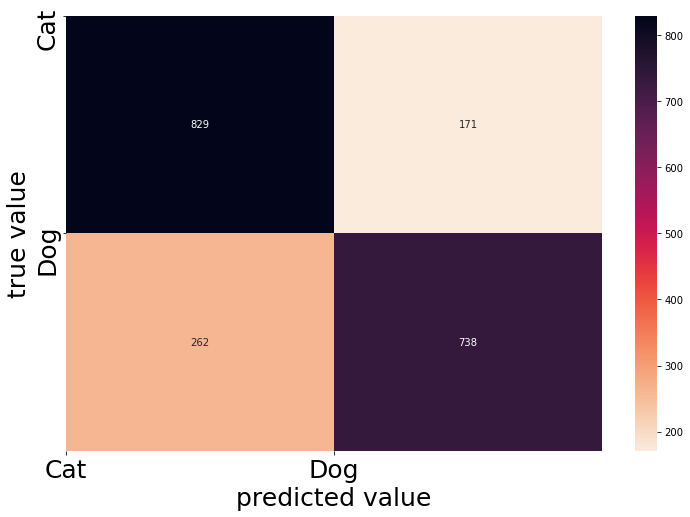

In [77]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="rocket_r",annot=True,fmt='g');
plt.xlabel('predicted value',fontsize=25)
plt.ylabel('true value',fontsize=25);
plt.xticks([0,1],['Cat','Dog'],fontsize=25)
plt.yticks([0,1],['Cat','Dog'],fontsize=25)

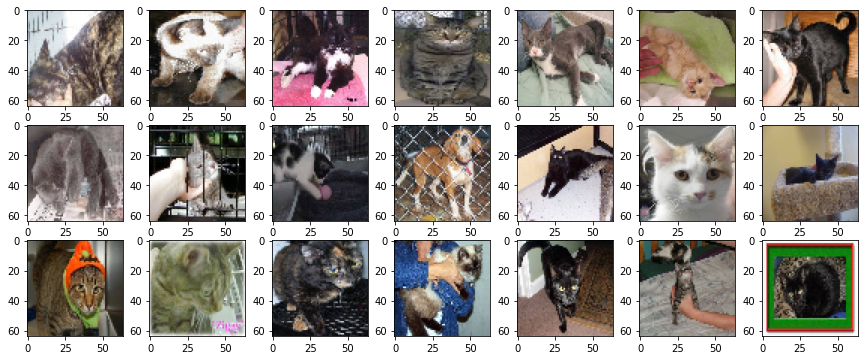

In [58]:
#Some of Cat image misclassified as Dog.
import matplotlib.image as mpimg

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
#     img = mpimg.imread()
    img = load_img('test/'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

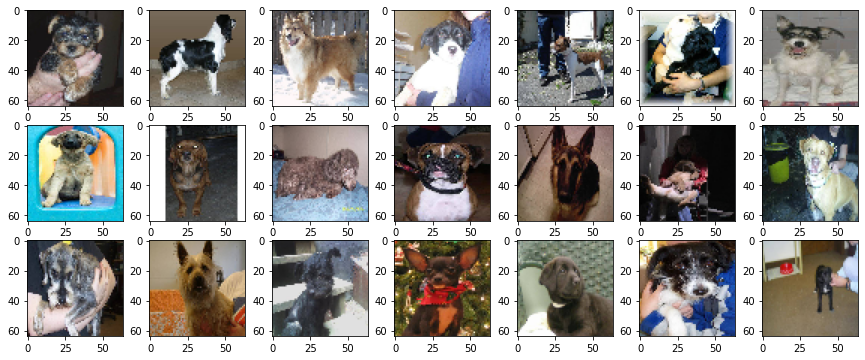

In [60]:
#Some of Dog image misclassified as Cat.
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
#     img = mpimg.imread()
    img = load_img('test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

In [61]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                